kmp 2023

Based on **Lauwens & Downey "Think Julia: How to Think Like a Computer Scientist"** 
https://benlauwens.github.io/ThinkJulia.jl/latest/book.html**

Resources:

Julia webpage https://julialang.org/ 

Julia documentation https://docs.julialang.org/en/v1/


In [1]:
using ImageIO, ImageShow, FileIO

## Chapter 03 -- Functions

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap03

A function is a **named sequence of statements** that performs a computation. When you **define a function**, you specify the name and the sequence of statements. Later, you can **call** the function by its name.

### Function Calls

```Julia
	julia> println("Hello, World!")
```

The name of the function is `println`. The expression in parentheses is called the **argument** of the function. It is common to say that a function takes an argument and returns a **result**. The result is also called the **return value**. In this case the function call prints the string to screen and returns the value **nothing** which is of the Julia type **Nothing**.

In [2]:
str = println("Hello, World!")
#println()
println(str)
typeof(str)

Hello, World!
nothing


Nothing

### Math Functions

In Julia, most of the familiar mathematical functions are directly available:

```Julia
	ratio = signal_power / noise_power
	decibels = 10 * log10(ratio)
```

This first example uses **log10** to compute a signal-to-noise ratio in decibels (assuming that signal\_power and noise_power are defined); **log** computes the natural logarithm. 

In [3]:
signal_power = 103
noise_power = 100
ratio = signal_power / noise_power
decibels = 10 * log10(ratio)

0.12837224705172218

The second example finds the sine of radians. 

```Julia
	radians = 0.7
	height = sin(radians)
```

The name of the variable is a hint that **sin** and the other trigonometric functions (**cos, tan**, etc.) take arguments in **radians**. To convert from degrees to radians, divide by 180 and multiply by π.

The value of the **constant π** is a **floating-point approximation** of π, accurate to about 16 digits.

In [4]:
radians = 0.7
width = cos(radians)

0.7648421872844885

In [5]:
degrees = 45
radians = degrees / 180 * π

0.7853981633974483

If you know trigonometry, you can check the previous result by comparing it to the arcsine **asin** of the square root of two divided by two:

In [6]:
asin( sqrt(2)/ 2 )

0.7853981633974484

### Function Composition

The most useful feature of programming languages is their ability to take small building blocks and **compose** them. For example, **the argument of a function can be any kind of expression**, including arithmetic operators:

```Julia
	x = sin(degrees / 360 * 2 * π)
```

Note the evaluation of the expression from left-to-right because of equal precedence (PEMDAS). So `x = sin(degrees / 360 * 2 * π)` is evaluated as

```Julia
	x = sin( ( (degrees / 360) * 2 ) * π)
```

In [12]:
z = 3
y = exp(log(z+1))       # a function call expression as argument

4.0

Almost anywhere you can put a value, you can put an arbitrary expression, with one exception: the **left side of an assignment statement** has to be a variable name. Any other expression on the left side is a syntax error (we will see exceptions to this rule later).

### Add New Functions to Julia

A **function definition** specifies the name of a new function and the sequence of statements that run when the function is called. 

Syntax:

```Julia
	function name(argument::type)::type #  type specification is optional
		body of statements and expressions
		return values  			#  return is optional here
	end
```

The first line of the function definition is called the **header**; the rest is called the **body**. The body is terminated with the keyword **end** and it can contain any number of statements. For readability the body of the function is preferably indented.

Here is a particular example of a function definition which takes no input arguments and returns `nothing` when called:


In [8]:
function printlyrics() # the function definition creates a function-object 
    println("I'm a lumberjack, and I'm okay.")
    println("I sleep all night and I work all day.")
end

printlyrics() # the function call tells Julia to execute the function

I'm a lumberjack, and I'm okay.


I sleep all night and I work all day.


In [19]:
output = printlyrics()

typeof(output)

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


Nothing

In [22]:
println("$(printlyrics())")

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.
nothing

**function** is a keyword that indicates that this is a **`function definition`**. The rules for **function names** are the same as for variable names: 
- they can contain almost all Unicode characters, **but the first character cannot be a number**. 
- you **cannot use a keyword** as the name of a function
- you should **avoid having a variable and a function with the same name**.

The empty parentheses after the name printlyrics() indicate that this function does not take any arguments.

If you type a function definition in **interactive mode**, the REPL indents to let you know that the definition is not complete:

```Julia
	julia> function printlyrics()
		println("I'm a lumberjack, and I'm okay.")
```

To end the function definition, you have to enter **end**.

In order to execute the function, the function has to be called (the same syntax as for calling built-in functions):

```Julia
	julia> printlyrics()
		I'm a lumberjack, and I'm okay.
		I sleep all night and I work all day.
```

Once you have defined a function, you can use it inside another function definition. For example, to repeat the previous refrain, we could write a function called repeatlyrics:

```Julia
	function repeatlyrics()
		printlyrics()
		printlyrics()
	end
```

And then call repeatlyrics:

```Julia
	julia> repeatlyrics()
		I'm a lumberjack, and I'm okay.
		I sleep all night and I work all day.
		I'm a lumberjack, and I'm okay.
		I sleep all night and I work all day.
```

In [9]:
function printlyrics() # function definition
	println("I'm a lumberjack, and I'm okay.")
	println("I sleep all night and I work all day.")
end

function repeatlyrics() # function definition
	printlyrics()
	println()
	printlyrics()
end

repeatlyrics() # function call

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


### Definition and Use

The above program contains two **function definitions**: `printlyrics` and `repeatlyrics`. 

Function definitions get executed just like other statements and the effect is to create **function objects**. The statements inside the function do not run until the function is **called**. As you might expect, you have to create a function before you can use it. In other words, **the function definition has to run before the function can be called**.

### Exercise 3-1

Move the last line of this program to the top, so the function call appears before the definitions. Run the program and see what error message you get.

Now move the function call back to the bottom and move the definition of printlyrics after the definition of repeatlyrics. What happens when you run this program?

In [10]:
function repeatlyrics() # function definition
	printlyrics()
	println()
	printlyrics()
end

function printlyrics() # function definition
	println("I'm a lumberjack, and I'm okay.")
	println("I sleep all night and I work all day.")
end

repeatlyrics() # function call

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


### Execution Flow

To ensure that a function is defined before its first use, you have to know the order statements are run, the **flow of execution**. Execution always begins at the first statement of the program. Statements are run one at a time, in order from top to bottom. 

**Function definitions do not alter the flow of execution of the program, and statements inside the function do not run until the function is called in the program.**

A **function call**, which is different from a **function definition**, is like a detour in the flow of execution. Instead of going to the next statement, the **execution flow jumps** or **branches** to the body of the function, runs the statements there, and then jumps back to pick up where it left off. 

**Note that one function can call another, so-called function composition.** While in the middle of one function, the program might have to run the statements in another function. Then, while running that new function, the program might have to run yet another function etc. 

In summary, when you read a program, you do not always want to read from top to bottom. Sometimes it makes more sense to follow the flow of execution.

### Parameters and Arguments

Some functions take zero input arguments and other require one or several arguments in their function call. For example: `parse` takes two, a number type and a string, see https://docs.julialang.org/en/v1/base/numbers/#Base.parse.

Here is a definition for a function that takes one argument:

```Julia
	function printtwice(bruce)
		println(bruce)
		println(bruce)
	end
```

Inside the function, the **arguments** are assigned to **variables called parameters**. In a function call, e.g., printtwice("eva"), this function **assigns** the argument "eva" to a **parameter** named bruce. 

When the function is called, it prints the parameter value ("eva") twice. This function works with any value that can be printed.

```Julia
	julia> printtwice("Spam")
		Spam
		Spam

	julia> printtwice(42)
		42
		42

	julia> printtwice(π)
		π = 3.1415926535897...
		π = 3.1415926535897...
```

The same **rules of composition** that apply to built-in functions also apply to programmer-defined functions, so we can use any kind of expression as an argument for printtwice:

```Julia
	julia> printtwice("Spam "^4)
		Spam Spam Spam Spam
		Spam Spam Spam Spam

	julia> printtwice(cos(π))
		-1.0
		-1.0
```

**The argument is evaluated before the function is called**, so the expressions "Spam "^4 and cos(π) are only evaluated once, and then assigned to the function internal parameter(s).

You can also use a variable as an argument:

```Julia
	julia> michael = "Eric, the half a bee."
		"Eric, the half a bee."

	julia> printtwice(michael)
		Eric, the half a bee.
		Eric, the half a bee.
```

The name of the variable we pass as an argument (michael) has nothing to do with the name of the parameter (bruce), instead its value becomes assigned to the parameter in the function call.

### Function Variables and Parameters Are Local

When you create a variable inside a function, it is a **local variable**, which means that it only **exists inside the function**.

For example:

```Julia
	function cattwice(part1, part2)
		# local variable in an assignment statement
		concat = part1 * part2  
		printtwice(concat)
	end
```

This function takes two input arguments, concatenates them, and assign the value to the local variable concat and finally prints the result twice. Here is an example that uses it:

```Julia
	julia> line1 = "Bing tiddle "
		"Bing tiddle "

	julia> line2 = "tiddle bang."
		"tiddle bang."

	julia> cattwice(line1, line2)
		Bing tiddle tiddle bang.
		Bing tiddle tiddle bang.
```

When `cattwice` terminates, the variable concat is destroyed. If we try to print it, we get an exception:

```Julia
	julia> println(concat)
		ERROR: UndefVarError: concat not defined
```

Parameters are also local. For example, outside printtwice, there is no such thing as bruce.

### Stack Diagrams

To keep track of which variables can be used where, it is sometimes useful to draw a stack diagram. Like state diagrams, stack diagrams show the value of each variable, but they also show the function each variable belongs to. 

Each function is represented by a **frame**. A frame is a box with the name of a function beside it and the parameters and variables of the function inside it.

The frames are arranged in a **stack** that indicates which function called which, and so on. **Main** is a special name for the topmost frame. When you create a variable outside of any function, it belongs to Main.

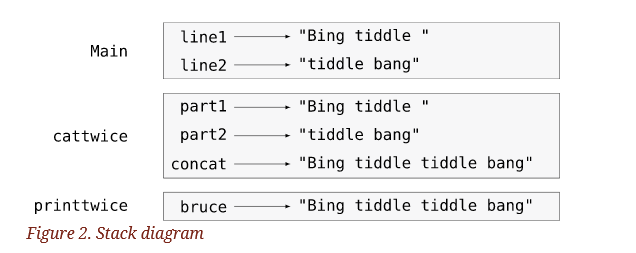

In [11]:
load("stack-diagram.png")

**If an error occurs during a function call, Julia prints the name of the function, the name of the function that called it, and the name of the function that called that, all the way back to Main.**

For example, if you try to access concat from within printtwice:

```Julia

	function printtwice(bruce)
		println(bruce)
		println(bruce)
		concat
	end

	function cattwice(part1, part2)
		concat = part1 * part2
		printtwice(concat)
	end
```

you get a **UndefVarError**

```Julia
	ERROR: UndefVarError: concat not defined
	Stacktrace:
	[1] printtwice at ./REPL[1]:2 [inlined]
	[2] cattwice(::String, ::String) at ./REPL[2]:3
```

This list is called a **stacktrace**. It tells you what program file the error occurred in, and what line, and what functions were executing at the time. It also shows the line of code that caused the error. **The order of the functions in the stacktrace is the inverse of the order of the frames in the stack diagram. The function that is currently running is at the top.**

In [23]:
function printtwice(bruce)
    println(bruce)
    println(bruce)
    concat
end

function cattwice(part1, part2)
    concat = part1 * part2
    printtwice(concat)
end

cattwice("bla", "bla")

blabla
blabla

UndefVarError: UndefVarError: `concat` not defined

In [25]:
golden(y) = (sqrt(y) + 1) / 2

golden(5)

1.618033988749895

Some functions, such as the math functions, return results, are sometimes called **non-void or fruitful** functions. Other functions, like printtwice, perform an action but do not return a value. They are called **void functions**.

When you call a fruitful function, you almost always want to do something with the result; for example, you might assign it to a variable or use it as part of an expression:

```Julia
	x = cos(radians)				# built-in function

	golden(y) = (sqrt(y) + 1) / 2	# short-form function definition
```

When you call a function in interactive mode, Julia displays the result:

```Julia
	julia> sqrt(5)	
		2.23606797749979
	# the return value is assigned to the variable ans (not shown)
```

**In a script, if you call a fruitful function all by itself, the return value is lost. You need to use the function call in an assignment statement or another function call.**

Void functions might display something on the screen or have some other effect, but it is not quite true that they do not have a return value. If you assign the result of a void function to a variable, you get a special value called **nothing** of type **Nothing**.

```Julia
	julia> result = printtwice("Bing")
		Bing
		Bing

	julia> show(result)
		Nothing
```

**To print the value Nothing, you have to use the function show which is like print but can handle the value nothing.**

The value **nothing** is not the same as the string "nothing". It is a special value that has its own type:

```Julia
	julia> typeof(nothing)
		Nothing
```

### Why Functions?

A function definition names a group of statements, which can be refered to in function calls and makes the program easier to read and debug. 

Functions eliminate repetitive code and later, if you make a change, you only have to make it in one place.

Dividing a long program into functions allows you to debug the parts one at a time and then assemble them into a working whole. Well-designed functions are often useful for many programs. Once you write and debug one, you can reuse it.

### Debugging

**One of the most important skills you will acquire is debugging skills.** 

Although it can be frustrating, debugging is one of the most challenging and interesting parts of programming. In some ways debugging is detective work. You are confronted with clues and you have to infer the processes and events that led to the results you see.

For some people, **programming and debugging are the same thing**. That is, programming is the process of gradually debugging a program until it does what you want. The idea is that you should start with a working program and make small modifications, debugging them as you go. 

## Exercises

### Exercise 3-2

Write a function named rightjustify that takes a string named s as a parameter and prints the string with enough leading spaces so that the last letter of the string is in column 70 of the display.

```Julia
	julia> rightjustify("monty")
                                                                 monty
```
Tip: Use string concatenation and repetition. Also, Julia provides a built-in function called **length** that returns the length of a string, so the value of length("monty") is 5.

### Exercise 3-3

**A function object is a value you can assign to a variable or pass as an argument**. For example, _dotwice_ is a function that takes a function object as an argument and calls it twice:

```Julia
	function dotwice(f)
		f()
		f()
	end
```

Here’s an example that uses dotwice to call a function named _printspam_ twice.

```Julia
	function printspam()
		println("spam")
	end

	dotwice(printspam)
```

Type this example into a script and test it.

Modify dotwice so that it takes two arguments, a function object and a value, and calls the function twice, passing the value as an argument.

Copy the definition of printtwice from earlier in this chapter to your script. Use the modified version of dotwice to call printtwice twice, passing "spam" as an argument.

Define a new function called dofour that takes a function object and a value and calls the function four times, passing the value as a parameter. There should be only two statements in the body of this function, not four.

### Exercise 3-4

Write a function printgrid that draws a grid like the following:

```Julia
    julia> printgrid()
    + - - - - + - - - - +
    |         |         |
    |         |         |
    |         |         |
    |         |         |
    + - - - - + - - - - +
    |         |         |
    |         |         |
    |         |         |
    |         |         |
    + - - - - + - - - - +
```

Write a function that draws a similar grid with four rows and four columns.

Credit: This exercise is based on an exercise in Oualline, Practical C Programming, Third Edition, O’Reilly Media, 1997.

To print more than one value on a line, you can print a **comma-separated sequence of values** or a **list**:

```Julia
		println("+", "-")
```

The function **print** does not advance to the next line:

```Julia
		print("+ ")
		println("-")
```

The output of these statements is "+ -" on the same line. The output from the next print statement would begin on the next line.
